In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA 
## Understand the structure and quality of the data for a matching through similarity in profile task

In [3]:
df = pd.read_csv('/Users/henrique/Desktop/OKCupid (portfolio Codecademy)/profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [6]:
df.shape

(59946, 31)

In [7]:
df.isna().mean().sort_values(ascending=False)

offspring      0.593217
diet           0.406950
religion       0.337404
pets           0.332316
essay8         0.320705
drugs          0.234878
essay6         0.229723
essay9         0.210239
essay7         0.207704
essay3         0.191439
sign           0.184433
essay5         0.180996
essay4         0.175775
essay2         0.160778
job            0.136756
essay1         0.126314
education      0.110566
ethnicity      0.094752
smokes         0.091949
essay0         0.091549
body_type      0.088346
drinks         0.049795
speaks         0.000834
height         0.000050
sex            0.000000
age            0.000000
orientation    0.000000
location       0.000000
last_online    0.000000
income         0.000000
status         0.000000
dtype: float64

# Treat Missing Values

In [8]:
categorical_cols = [
    'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
    'job', 'location', 'orientation', 'pets', 'religion', 'sex', 'sign',
    'smokes', 'speaks', 'status'
]

df[categorical_cols] = df[categorical_cols].fillna('unknown')


In [78]:
numeric_cols = ['age', 'height', 'income']

for col in numeric_cols:
    median = df[col].median()
    df[col] = df[col].fillna(median)



In [79]:
#Cleaning of the data in the essay cols
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'<.*?>', ' ', text)
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    text = re.sub(r'http\S+', ' ', text)
    return text.strip()

essay_cols = [f'essay{i}' for i in range(10)]

for col in essay_cols:
    df[col] = df[col].fillna("").apply(clean_text)

#Create new columns of all essays together (better for NLP)
df['all_essays'] = df[essay_cols].agg(' '.join, axis = 1)






In [11]:
df.all_essays[0]

"about me: i would love to think that i was some some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. can't say i can tell the difference. i love to talk about ideas and concepts. i forge odd metaphors instead of reciting cliches. like the simularities between a friend of mine's house and an underwater salt mine. my favorite word is salt by the way (weird choice i know). to me most things in life are better as metaphors. i seek to make myself a little better everyday, in some productively lazy way. got tired of tying my shoes. considered hiring a five year old, but would probably have to tie both of our shoes... decided to only wear leather shoes dress shoes. about you: you love to have really serious, really deep conversations about really silly stuff. you have to be willing to snap me out of a light hearted rant with a kiss. you don't have to be funny, but you have to be able to make me laugh. you should be able to bend spoons with your mind, and telepat

In [12]:
num_emtpy = df['all_essays'].apply(lambda x: len(x.strip())==0).sum()
print(num_emtpy)

2126


In [13]:
# 2,126 entries in 'all_essays' are empty.
# Replace them with 'no text' to avoid issues in future models.

# Replace empty 'all_essays' with 'no text' for model safety
df['all_essays'] = df['all_essays'].apply(lambda x: x if len(x.strip()) > 0 else "no text")

In [14]:
num_emtpy = df['all_essays'].apply(lambda x: len(x.strip())==0).sum()
print(num_emtpy)

0


In [15]:
#fill the offspring column since it might be inportant for a matching problem
df['offspring'] = df['offspring'].fillna("no info")

#create offspring missing as 1 if it had no info and 0 if it had
df['offspring_missing'] = df['offspring'].apply(lambda x: 1 if x=='no info' else 0)

In [16]:
df.isna().sum()

age                  0
body_type            0
diet                 0
drinks               0
drugs                0
education            0
essay0               0
essay1               0
essay2               0
essay3               0
essay4               0
essay5               0
essay6               0
essay7               0
essay8               0
essay9               0
ethnicity            0
height               0
income               0
job                  0
last_online          0
location             0
offspring            0
orientation          0
pets                 0
religion             0
sex                  0
sign                 0
smokes               0
speaks               0
status               0
all_essays           0
offspring_missing    0
dtype: int64

# Preprocessing to be able to apply model

In [80]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_cols = [
    'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
    'job', 'location', 'orientation', 'pets', 'religion', 'sex', 'sign',
    'smokes', 'speaks', 'status'
]

df_tab = df[numeric_cols + categorical_cols + ['offspring_missing']].copy()


le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()

    # Force 'unknown' to exist as a class
    values = df[col].fillna('unknown').astype(str)
    if 'unknown' not in values.values:
        values = pd.concat([values, pd.Series(['unknown'])])

    le.fit(values)
    df_tab[col] = le.transform(values.iloc[:len(df_tab)])
    le_dict[col] = le

scaler = StandardScaler()
x_num = scaler.fit_transform(df_tab[numeric_cols + ['offspring_missing']])

x_cat = df_tab[categorical_cols].values

x_tabular = np.hstack([x_num, x_cat])


# Embedding for the all_essays column
## This creates vectors entries instead of text

In [62]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
from sentence_transformers import SentenceTransformer

emb = SentenceTransformer('all-MiniLM-L6-V2')
embeddings = emb.encode(df['all_essays'].tolist(), batch_size = 64, show_progress_bar = True)

Batches:   0%|          | 0/937 [00:00<?, ?it/s]

In [63]:
x_final = np.hstack([x_tabular, embeddings])

x_final

array([[-1.09389797,  1.67841989, -0.20580558, ...,  0.08755298,
        -0.11992544, -0.04980792],
       [ 0.28137044,  0.42675217,  0.61602078, ...,  0.00268829,
        -0.18531048, -0.09817512],
       [ 0.59874007, -0.07391492, -0.20580558, ...,  0.0158243 ,
        -0.1088091 , -0.03879662],
       ...,
       [ 1.02189958,  0.67708571,  0.82147481, ...,  0.02056732,
        -0.0889006 , -0.01333535],
       [-0.56494858,  1.1777528 , -0.20580558, ...,  0.02074204,
         0.02799699, -0.02441429],
       [ 0.70452995, -0.07391492, -0.20580558, ..., -0.04590638,
        -0.09893063, -0.02628153]])

In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 19, random_state=14)
df['cluster'] = kmeans.fit_predict(x_final)



### after model is fit and clusters created lets see what they look like

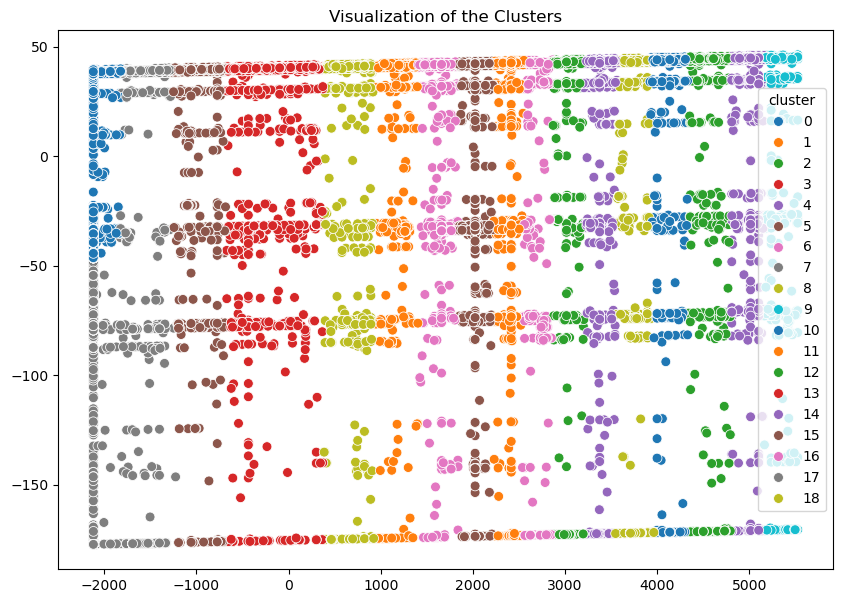

In [65]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
x_reduce = pca.fit_transform(x_final)


plt.figure(figsize=(10, 7))
sns.scatterplot(x = x_reduce[:,0], y= x_reduce[:, 1], hue = df['cluster'], palette='tab10', s=50)
plt.title('Visualization of the Clusters')
plt.show()

### A bit of clutter as we can see, let's try to make clusters make more sense

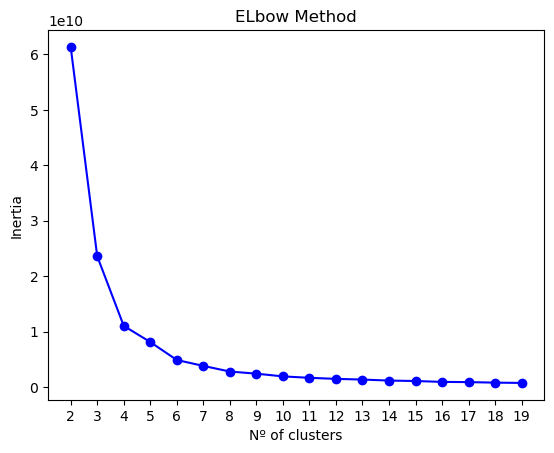

In [66]:
inertia = []

K = range(2, 20)

for k in K:
    km = KMeans(n_clusters=k, random_state=14)
    km.fit(x_final)
    inertia.append(km.inertia_)


plt.clf()
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nº of clusters')
plt.ylabel('Inertia')
plt.title('ELbow Method')
plt.xticks(range(2, 20))
plt.show()

<Figure size 640x480 with 0 Axes>

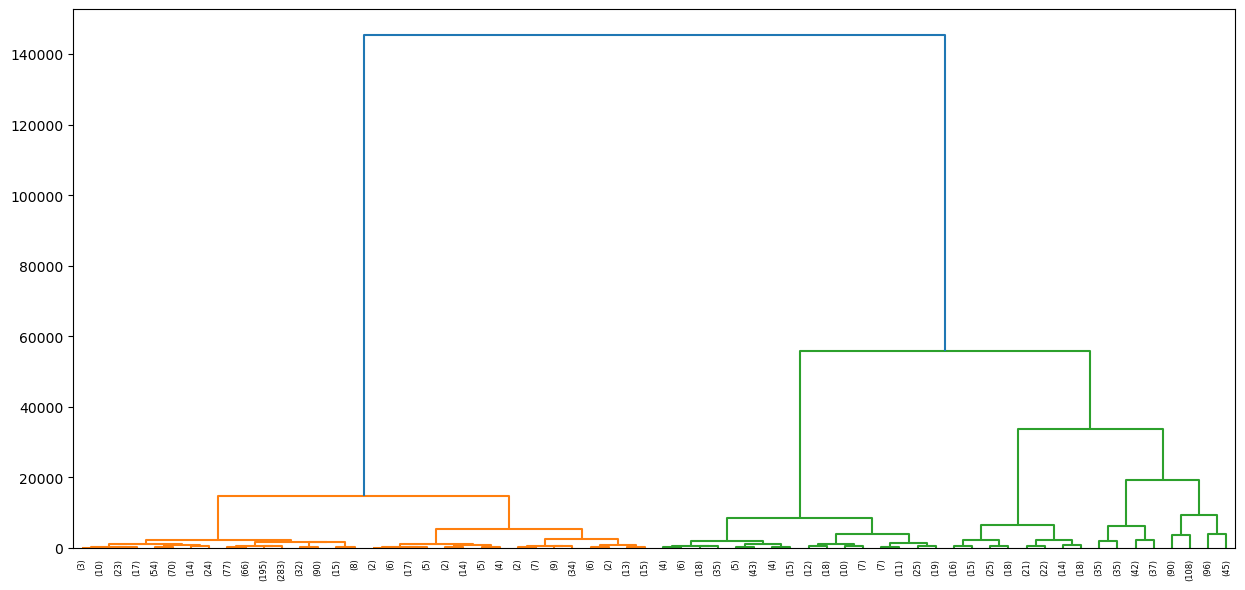

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage

sample_size = 2000
x_sample = x_final[:sample_size]

z_matrix = linkage(x_sample, method='ward')

plt.clf()
plt.figure(figsize=(15, 7))
dendrogram(z_matrix,
           truncate_mode='level',
           p=5
           )
plt.show()


### Through elbow method and dendrogram we conclude that the optimal amount of clusters would be 4

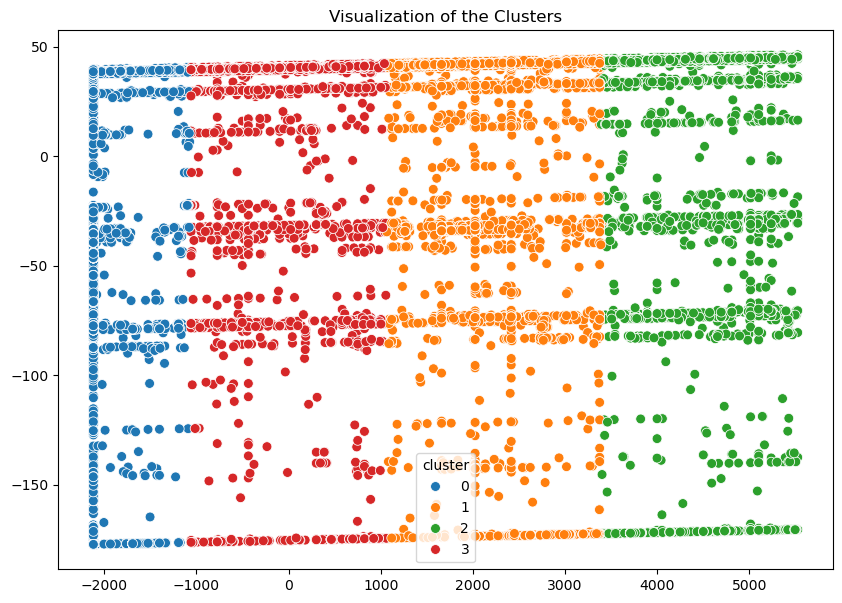

In [68]:
# Train optimized model and view new clusters


kmeans = KMeans(n_clusters = 4, random_state=14)
df['cluster'] = kmeans.fit_predict(x_final)



pca = PCA(n_components=2)
x_reduce = pca.fit_transform(x_final)


plt.figure(figsize=(10, 7))
sns.scatterplot(x = x_reduce[:,0], y= x_reduce[:, 1], hue = df['cluster'], palette='tab10', s=50)
plt.title('Visualization of the Clusters')
plt.show()

In [69]:
df['cluster'].value_counts()

cluster
0    31926
1    12160
2     8629
3     7231
Name: count, dtype: int64

In [70]:
df.groupby('cluster')[['age', 'height', 'income']].mean()

,age,height,income
cluster,,,
0,32.630740,68.304266,18122.976446
1,31.354770,68.303701,24022.236760
2,32.255070,68.065245,20008.423224
3,32.816899,68.515835,21788.733094


In [71]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x_final, df['cluster'])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.7605


In [72]:
#Evaluate how well the model would suggest similar profiles to the profile at index 0

from sklearn.metrics.pairwise import cosine_similarity

def get_top_n_matches(x_final, profile_index, top_n=5):
    sim = cosine_similarity([x_final[profile_index]], x_final)[0]
    same_cluster_indices = df.index[df['cluster'] == df.loc[profile_index, 'cluster']].tolist()
    sim_filtered = [(i, sim[i]) for i in same_cluster_indices if i != profile_index]
    sim_filtered.sort(key=lambda x: x[1], reverse=True)
    top_matches = sim_filtered[:top_n]
    top_indices = [i for i, s in top_matches]
    top_scores = [s for i, s in top_matches]
    return top_indices, top_scores


top_indices, top_scores = get_top_n_matches(x_final, 0)
print("Top 5 matches:", top_indices)
print("Similarities:", top_scores)

Top 5 matches: [40067, 36525, 25866, 28067, 6055]
Similarities: [0.9980260814247139, 0.9974487508357551, 0.997331162225217, 0.9972829222644396, 0.9970539578228825]


### Lets make a function that takes new data and runs it through a pipeline so that our model can atribute a cluster to the new user

In [73]:

def clean_text_final(text):
    if text is None or (isinstance(text, float) and pd.isna(text)):
        return ""

    if not isinstance(text, str):
        text = str(text)

    # Remove HTML
    text = re.sub(r'<.*?>', ' ', text)

    # Remove URLs
    text = re.sub(r'http\S+', ' ', text)

    # Normaliza whitespaces
    text = re.sub(r'[\n\r\t]', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Remove caracteres não-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    return text.strip().lower()



In [74]:
def clean_categorical(value):
    if value is None or (isinstance(value, float) and pd.isna(value)):
        return "unknown"

    if not isinstance(value, str):
        value = str(value)

    value = value.strip().lower()

    if value == "":
        return "unknown"

    return value

In [81]:
def process_new_profile(
    new_row,
    model_emb,
    encoder_dict,
    scaler,
    kmeans,
    X_existing,
    df_existing,
    categorical_cols,
    numeric_cols,
    top_n=5
):
    # ---------- TEXT ----------
    essay_cols = [f'essay{i}' for i in range(10)]
    essays = []

    for col in essay_cols:
        raw_text = new_row.get(col, "")
        essays.append(clean_text_final(raw_text))

    all_essays = " ".join(essays).strip()
    if all_essays == "":
        all_essays = "no text"

    emb = model_emb.encode([all_essays])

    # ---------- NUMERIC ----------
    num_values = []
    for col in numeric_cols:
        val = new_row.get(col, None)
        if val is None or pd.isna(val):
            val = df_existing[col].median()
        num_values.append(val)

    offspring_missing = 1 if new_row.get("offspring", "no info") == "no info" else 0
    num_array = np.array(num_values + [offspring_missing]).reshape(1, -1)

    num_scaled = scaler.transform(num_array)

    # ---------- CATEGORICAL ----------
    cat_values = []
    for col in categorical_cols:
        raw_val = new_row.get(col, 'unknown')
        raw_val = clean_categorical(raw_val)

        le = encoder_dict[col]
        if raw_val not in le.classes_:
            raw_val = 'unknown'

        cat_values.append(le.transform([raw_val])[0])

    cat_array = np.array(cat_values).reshape(1, -1)

    # ---------- FINAL VECTOR ----------
    X_new = np.hstack([num_scaled, cat_array, emb])

    # ---------- CLUSTER ----------
    cluster = int(kmeans.predict(X_new)[0])

    # ---------- SIMILARITY ----------
    sim = cosine_similarity(X_new, X_existing)[0]
    same_cluster_idx = df_existing.index[
        df_existing['cluster'] == cluster
    ].tolist()

    sim_filtered = [(i, sim[i]) for i in same_cluster_idx]
    sim_filtered.sort(key=lambda x: x[1], reverse=True)

    return {
        "cluster": cluster,
        "top_matches": sim_filtered[:top_n]
    }

### Test a fake profile

In [82]:
fake_profile = {
    "age": 29,
    "body_type": "athletic",
    "diet": None,                 
    "drinks": "socially",
    "drugs": "never",
    "education": "masters program",
    "job": "data analyst",
    "location": "lisbon, portugal",
    "orientation": "straight",
    "pets": "likes dogs",
    "religion": None,             
    "sex": "m",
    "sign": "leo",
    "smokes": "no",
    "speaks": "english, portuguese",
    "status": "single",

   
    "essay0": "about me:<br />\nI love data, gym & dogs 🐕",
    "essay1": "Looking for someone chill.\n\nNo drama.",
    "essay2": None,
    "essay3": "Weekends = beach, coding & coffee ☕",
    "essay4": "",
    "essay5": "Travelling whenever possible!",
    "essay6": "I value honesty & growth.",
    "essay7": "<div>Music, podcasts & long walks</div>",
    "essay8": "Future goals: build cool things 🚀",
    "essay9": "If you like dogs, we’ll get along."
}

In [84]:
result = process_new_profile(
    new_row=fake_profile,
    model_emb=emb,
    encoder_dict=le_dict,
    scaler=scaler,
    kmeans=kmeans,
    X_existing=x_final,
    df_existing=df,
    categorical_cols=categorical_cols,
    numeric_cols=numeric_cols,
    top_n=5
)


/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [86]:
print("Cluster atributed", result["cluster"])
print("\nTop matches:")
for idx, score in result["top_matches"]:
    print(f"Profile {idx} | Similarity: {score:.3f}")

Cluster atributed 2

Top matches:
Profile 21444 | Similarity: 1.000
Profile 18075 | Similarity: 1.000
Profile 38706 | Similarity: 1.000
Profile 28109 | Similarity: 1.000
Profile 23897 | Similarity: 1.000
